In [1]:

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np


In [2]:

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(-1,28,28,1).astype('float32')/255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32')/255.0
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:

model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(28,28,1)))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(10, activation='softmax'))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,605,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,625,866 (6.20 MB)

 Trainable params: 1,625,866 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:

history = model.fit(x_train, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_data=(x_test, y_test_cat))


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 218s 231ms/step - accuracy: 0.7949 - loss: 0.5763 - val_accuracy: 0.8938 - val_loss: 0.2921
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 250s 217ms/step - accuracy: 0.8981 - loss: 0.2737 - val_accuracy: 0.8970 - val_loss: 0.2754
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 264s 219ms/step - accuracy: 0.9178 - loss: 0.2175 - val_accuracy: 0.9182 - val_loss: 0.2270
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 203s 217ms/step - accuracy: 0.9308 - loss: 0.1810 - val_accuracy: 0.9214 - val_loss: 0.2208
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 204s 218ms/step - accuracy: 0.9397 - loss: 0.1592 - val_accuracy: 0.9254 - val_loss: 0.2164
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 228s 243ms/step - accuracy: 0.9476 - loss: 0.1367 - val_accuracy: 0.9260 - val_loss: 0.2150
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 206s 220ms/step - accuracy: 0.9579 - loss: 0.1125 - val_accuracy: 0.9292 - val_loss: 0.2202
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 265s 223ms/step - accuracy: 0.9612 -

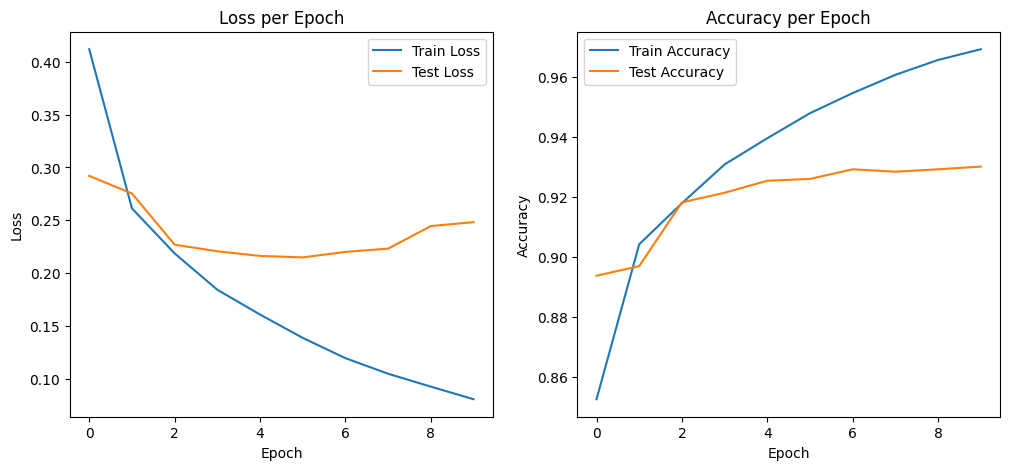

In [6]:

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss per Epoch')
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy per Epoch')
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 25ms/step


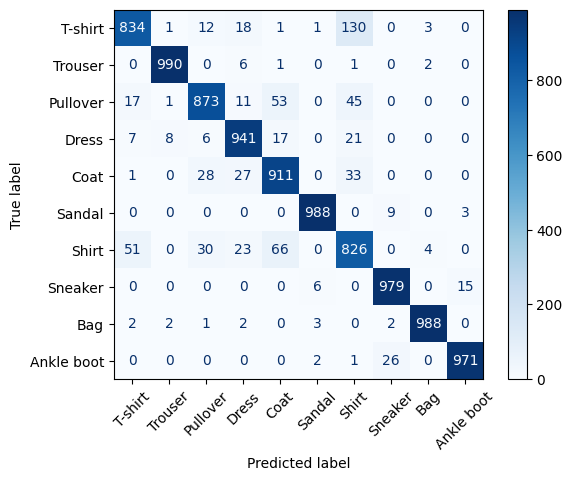

In [7]:

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.show()


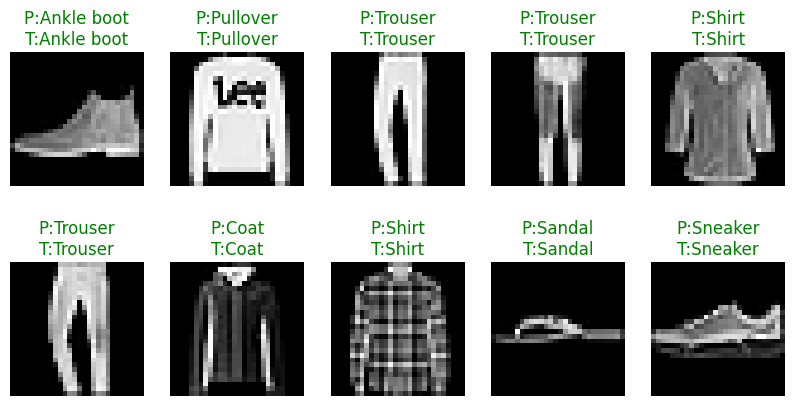

In [8]:

fig = plt.figure(figsize=(10,5))
examples = 0
for i in range(len(x_test)):
    if examples >= 10:
        break
    ax = fig.add_subplot(2,5,examples+1)
    ax.imshow(x_test[i].reshape(28,28), cmap='gray')
    ax.set_title(f"P:{['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'][y_pred_classes[i]]}\nT:{['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot'][y_test[i]]}",
                 color=('green' if y_pred_classes[i]==y_test[i] else 'red'))
    ax.axis('off')
    examples += 1
plt.show()
